## Урок 9. Инструменты разметки наборов данных

Задание 1.    
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.    

Задание 2.    
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.    

Задача 3.    
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.    

Задача 4.    
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.     

Задача 5.    
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.    
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

# Задание 1.    
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.  

В качестве датасета выбрали данные о прогнозирование рисков для здоровья беременных пациенток. https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/code

In [55]:
import pandas as pd

: 

In [ ]:
data = pd.read_csv('Maternal_Health_Risk_Data_Set.csv')
data

Для удобства перведем градусы фаренгейта в градусы цельсия и перепеишем данные в новый столбец, вставив его вместо столбца со старыми данными:

In [ ]:
def fahrenheit_to_celsius(f):
    return round((f - 32) * 5/9, 1)

# Применение функции к столбцу 'BodyTemp'
data['Body_Temp'] = data['BodyTemp'].apply(fahrenheit_to_celsius)

# Удаление исходного столбца 'BodyTemp'
data = data.drop('BodyTemp', axis=1)

columns_order = list(data.columns)
new_order = columns_order[:4] + ['Body_Temp'] + columns_order[4:-1]

# Создание нового датафрейма с новым порядком столбцов
data = data[new_order]

data

Для работы очистим данные столбца RiskLevel, чтобы потом заполнить его автоматически, используя разметку на основе правил:

In [58]:
data['RiskLevel'] = ""

Сохраним полученный файл и дальше будем работать с ним

In [59]:
data.to_csv('Data_HW_9.csv', index=False)

# Задание 2.    
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.    

In [ ]:
# Читаем полученный файл
df = pd.read_csv('Data_hw_9.csv')
df

In [61]:
# Разделим файл на 2 подмножества для разметки автоматически 95% и вручную 5% (pip install scikit-learn)
from sklearn.model_selection import train_test_split

subset_auto, subset_manual = train_test_split(df, test_size=0.05, random_state=42)

# Сохраним второе подмножество
subset_manual.to_csv('Subset_manual.csv', index=False)

# Деление множества поровну
#split_index = len(df) // 2

# Берем первую половину данных для автоматической разметки на основе правил
#subset_auto = df.iloc[:split_index, :]

# Берем вторую половину данных для ручной разметки в 4 задаче и сохраним его
#subset_manual = df.iloc[split_index:, :]
#subset_manual.to_csv('subset_manual.csv', index=False)

In [ ]:
# Определим под 1 подмножество правила
subset_auto

In [63]:
# 1 способ - через функцию
# def mark_rules(row):
#     if row['Age'] >= 18 and row['Age'] <= 45 and row['SystolicBP'] >= 110 and row['SystolicBP'] <= 130 and row['DiastolicBP'] >= 70 and row['DiastolicBP'] <= 85 and row['BS'] >= 4.1 and row['BS'] <= 7.2 and row['Body_Temp'] >= 36.4 and row['Body_Temp'] <= 36.9 and row['HeartRate'] >= 60 and row['HeartRate'] <= 90:
#         return 'Low risk'
#     else:
#         return 'High risk'

# subset_auto['RiskLevel'] = subset_auto.apply(mark_rules, axis=1)
# subset_auto.head()

In [64]:
# 2 способ - через loc()
# Присвоение начальных меток
subset_auto['RiskLevel'] = 'низкий риск'

# Условия для высокого риска
subset_auto.loc[subset_auto['Age'] < 18, 'RiskLevel'] = 'высокий риск'
subset_auto.loc[(subset_auto['Age'] >= 18) & (subset_auto['Age'] <= 45) & ((subset_auto['SystolicBP'] > 140) | (subset_auto['DiastolicBP'] > 90) | (subset_auto['BS'] > 140) | (subset_auto['Body_Temp'] > 38) | (subset_auto['HeartRate'] > 100)), 'RiskLevel'] = 'высокий риск'

# Условия для среднего риска
subset_auto.loc[(subset_auto['Age'] >= 35) & (subset_auto['Age'] <= 50) & ((subset_auto['SystolicBP'] > 120) | (subset_auto['DiastolicBP'] > 80) | (subset_auto['BS'] > 120) | (subset_auto['Body_Temp'] > 37.5) | (subset_auto['HeartRate'] > 90)), 'RiskLevel'] = 'средний риск'

In [ ]:
subset_auto.head(20)

In [ ]:
subset_auto.info()

In [67]:
subset_auto.to_csv('Subset_auto.csv', index=False)

# Задача 3.    
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.    

In [ ]:
df_manually = pd.read_csv('../HW_9/Subset_manual.csv', engine='python', encoding='utf-8', on_bad_lines='skip', encoding_errors='ignore')
df_manually.head()

Далее установим библиотеку label-studio с помощью команды в терминале: **pip install label-studio** и  терминале же запустим команду label-studio: **label-studio start**

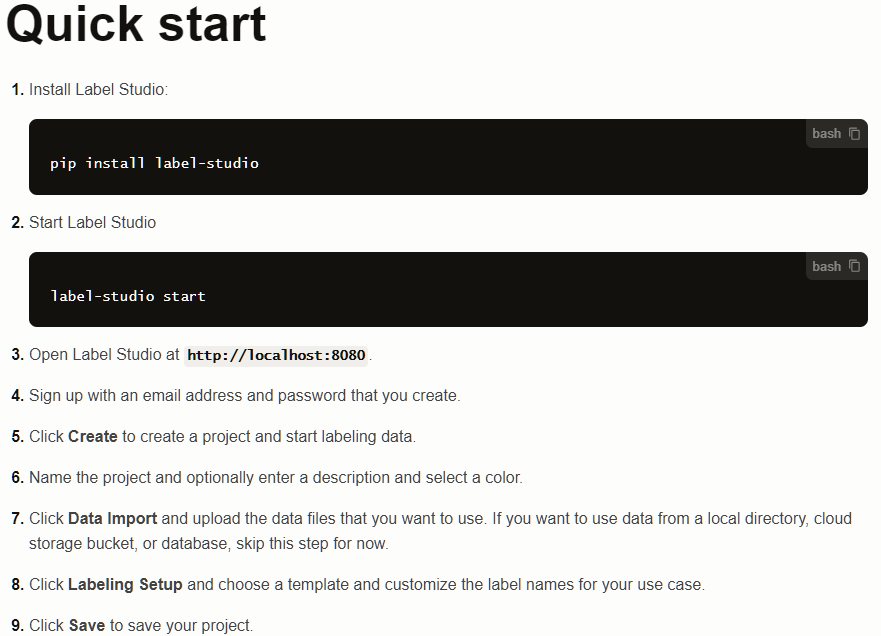

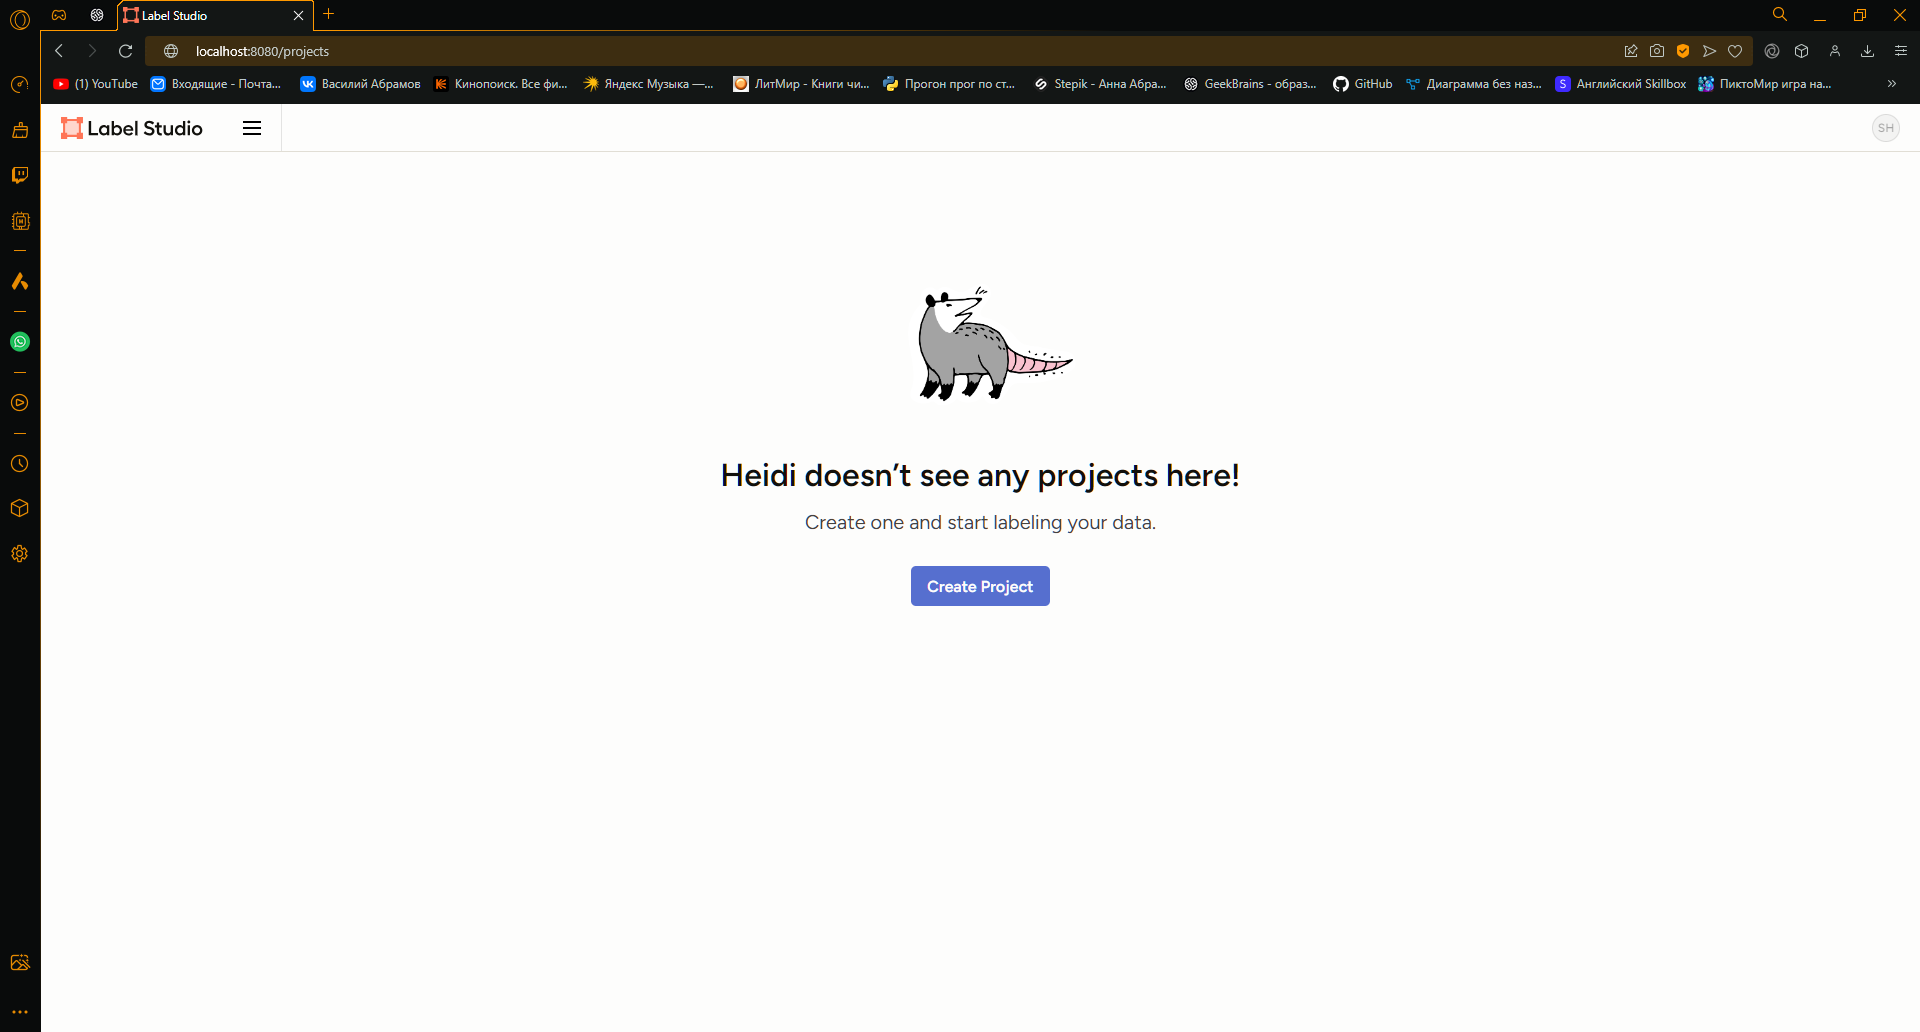

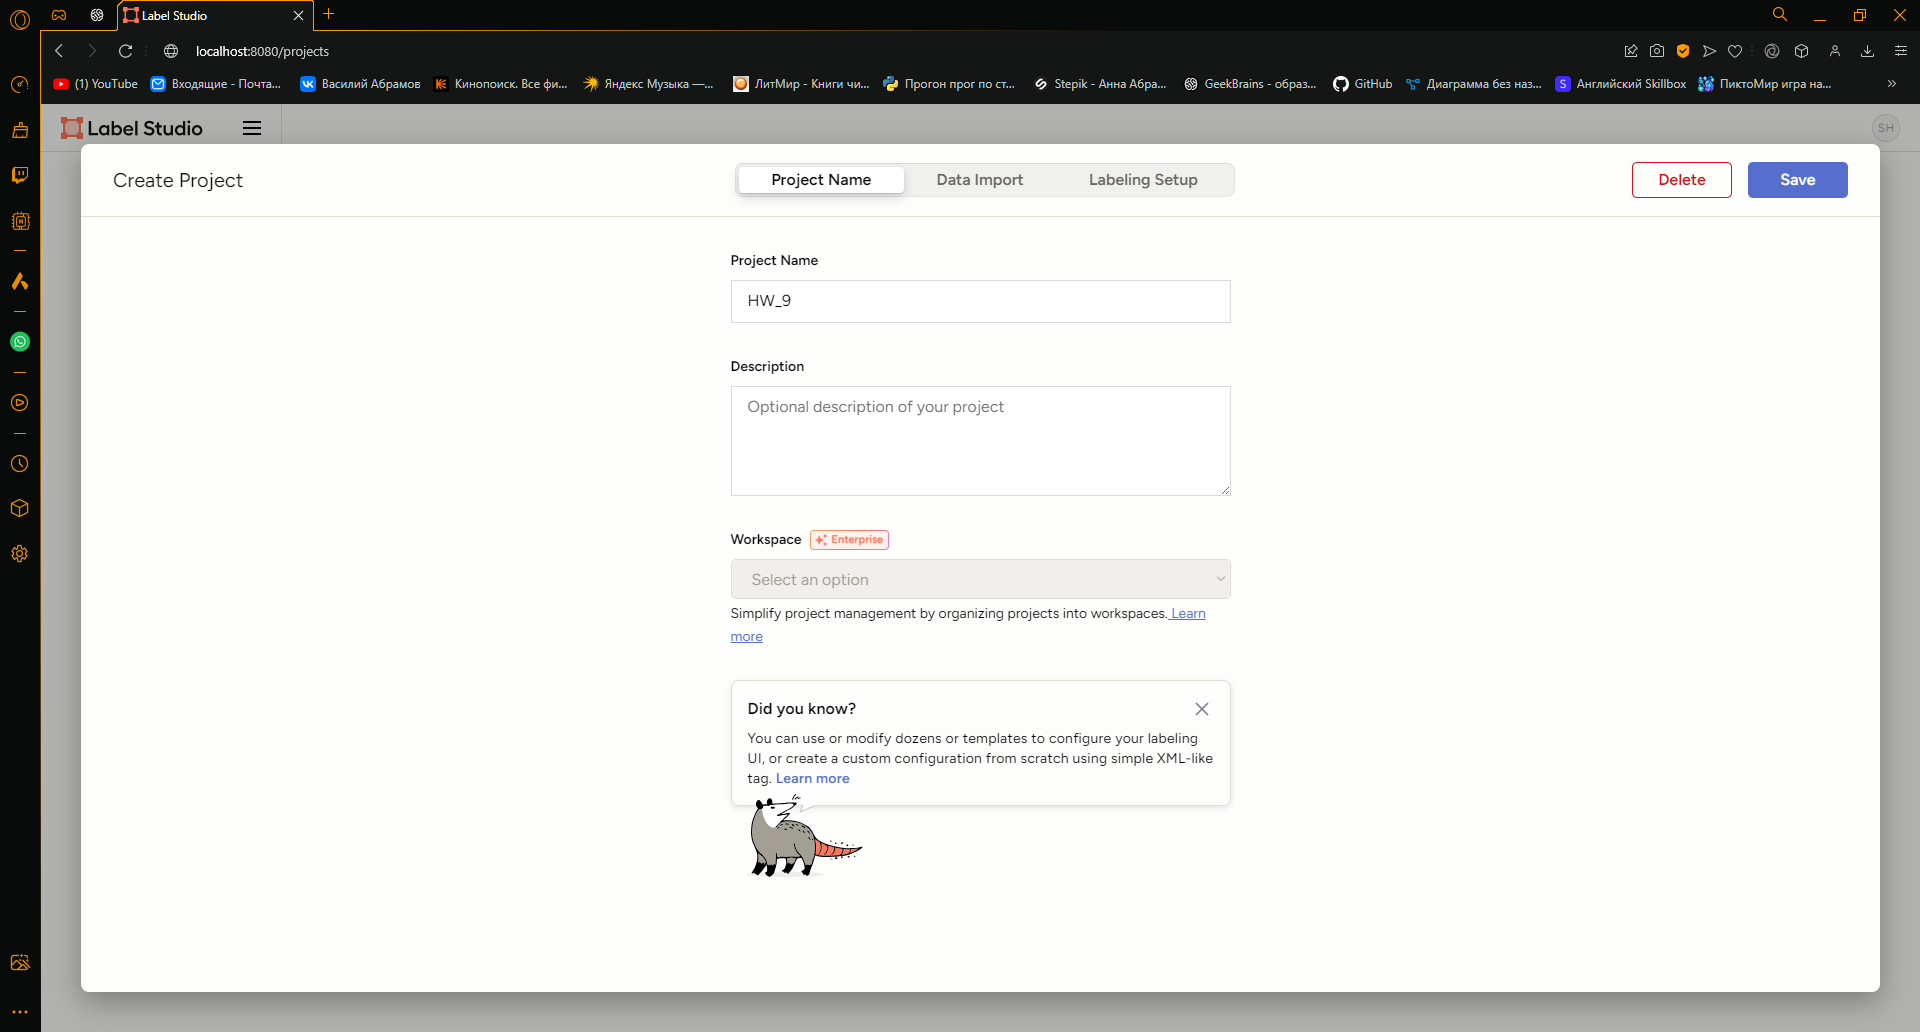

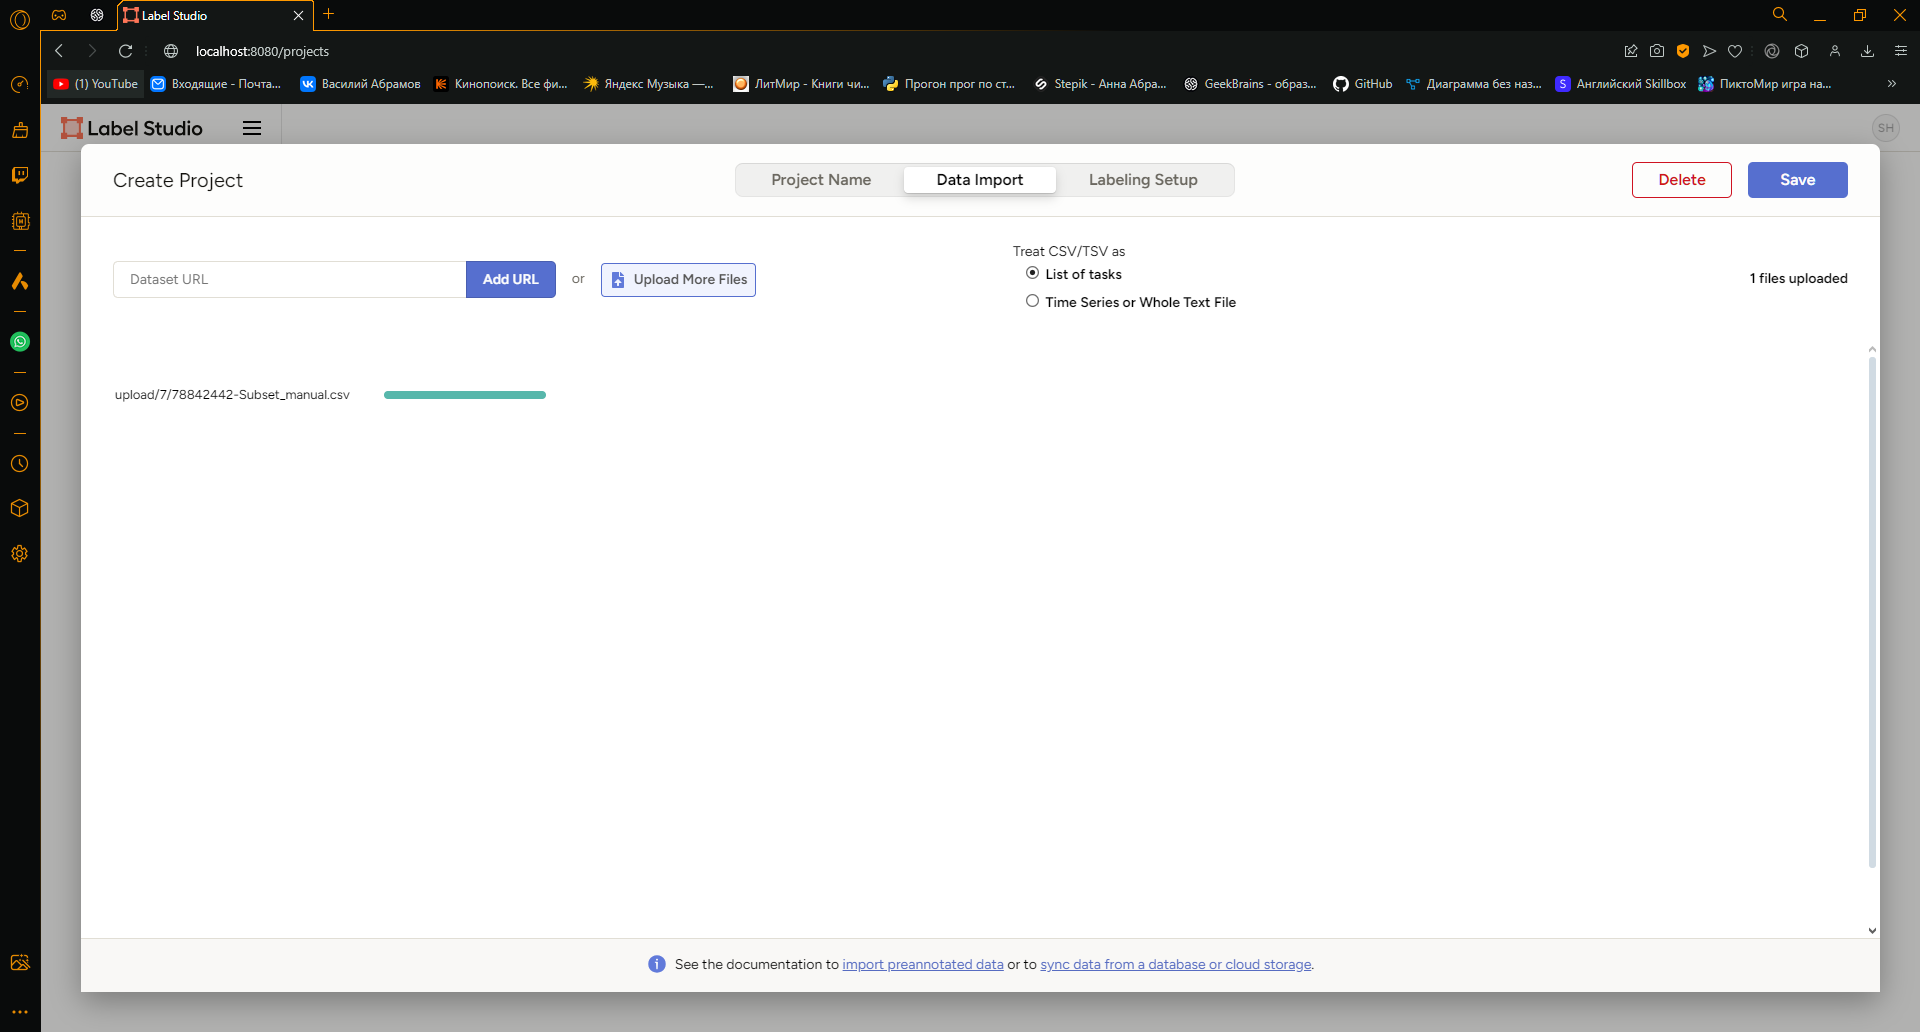

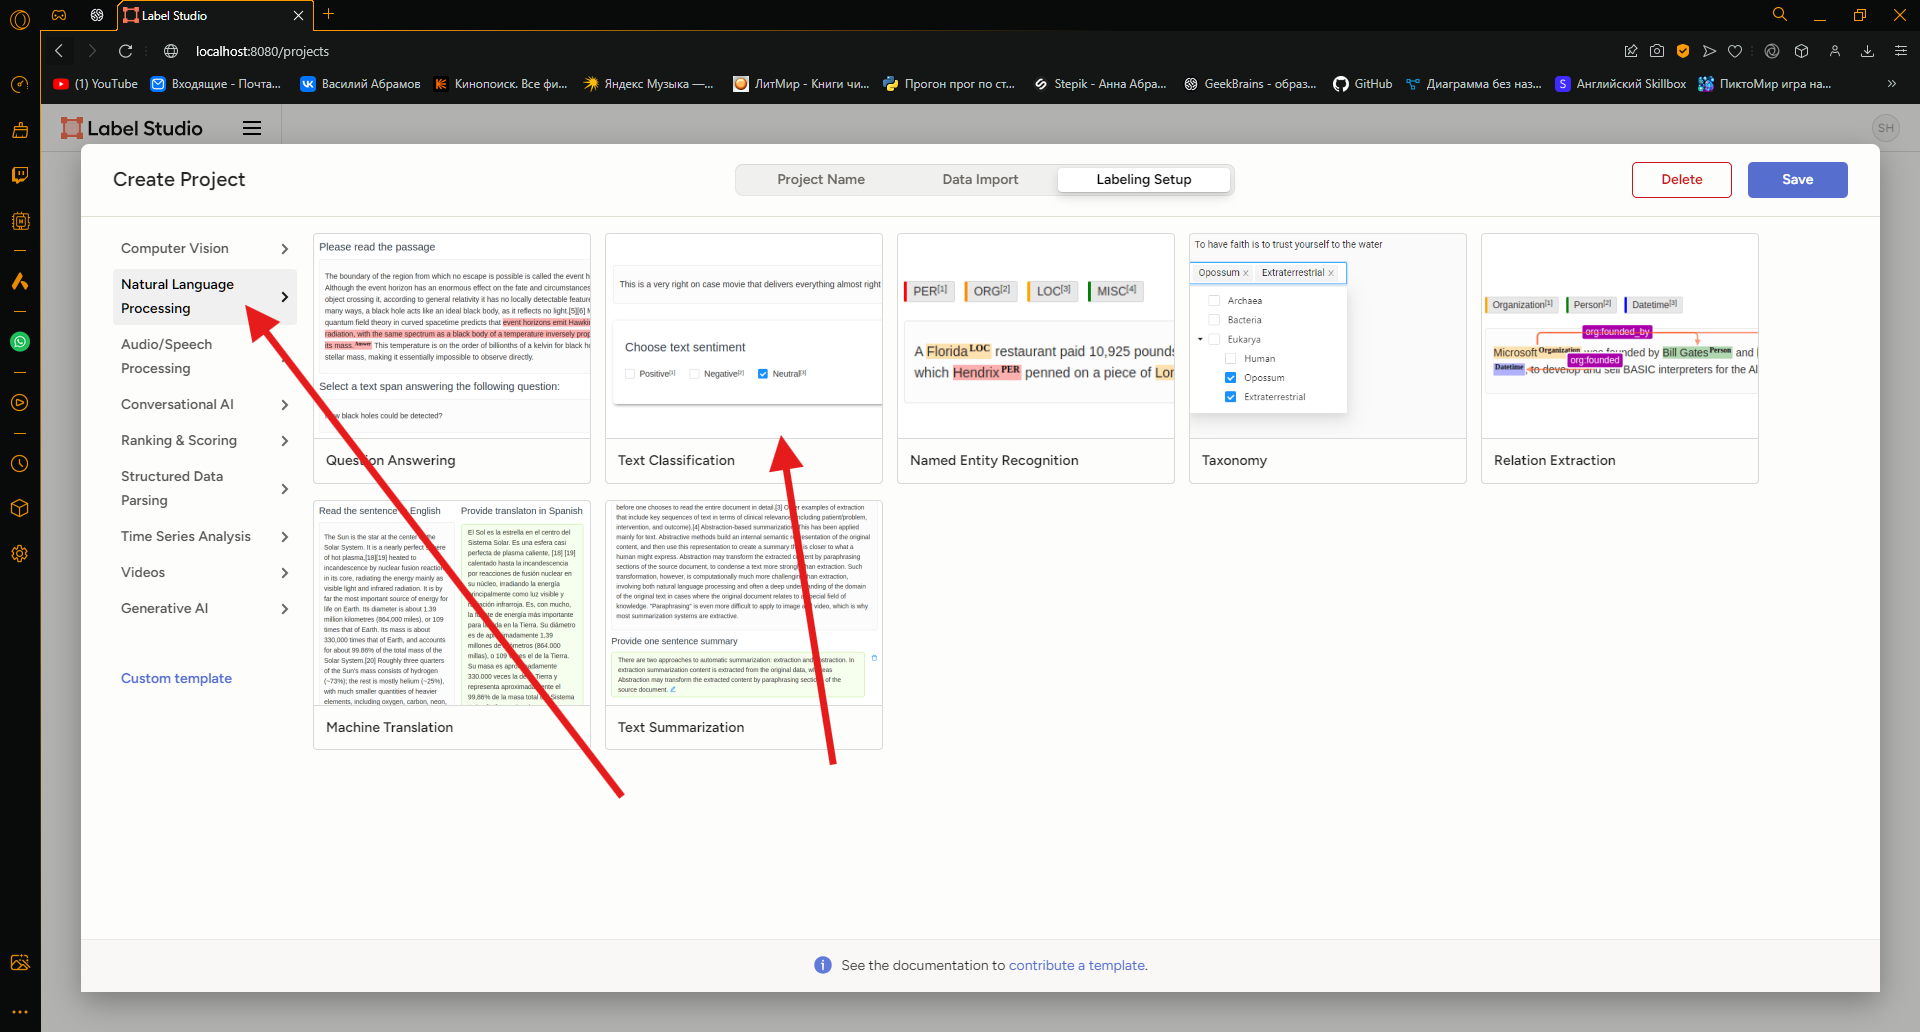

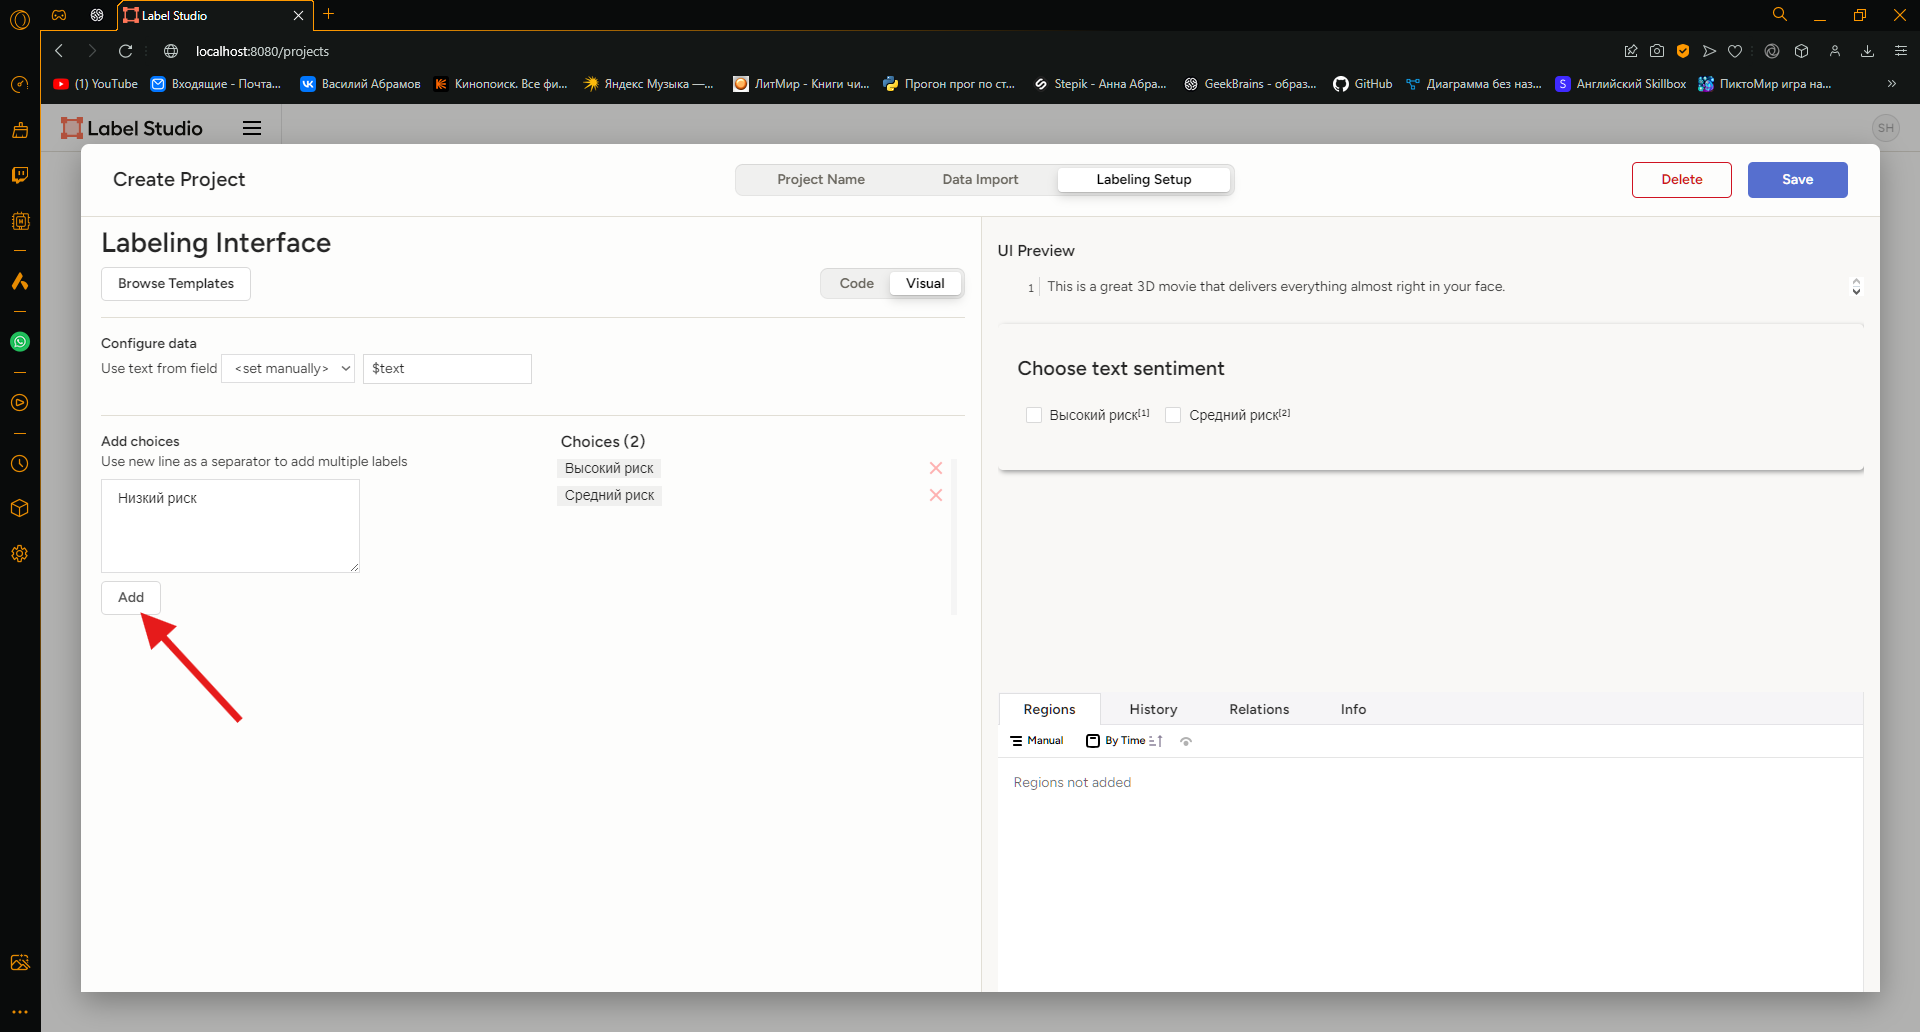

После ручной разметки сохраняем данные в файл: Subset_manual_check.csv

In [ ]:
# Проверим
df_man = pd.read_csv('../HW_9/Subset_manual_check.csv')
df_man.head()

In [ ]:
# Переопределим порядок столбцов для последующего объединения двух подмножеств
redefine = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'Body_Temp', 'HeartRate', 'RiskLevel', 'annotation_id', 'annotator', 'id','lead_time', 'sentiment']
df_man = df_man[redefine]
df_man.head()

In [71]:
# сохраним новую версию файла
df_man.to_csv('Subset_manual_check_1.csv', index=False)

# Задача 4.    
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.     


In [72]:
subset1 = pd.read_csv('Subset_auto.csv')
subset2 = pd.read_csv('Subset_manual_check_1.csv')

In [ ]:
subset2.head()

In [74]:
# Перенесем данные из столбца sentiment в столбец RiskLevel
subset2['RiskLevel'] = subset2['sentiment']

#Удалим ненужные нам столбцы
subset2.drop('annotation_id', axis=1, inplace=True)
subset2.drop('annotator', axis=1, inplace=True)
subset2.drop('id', axis=1, inplace=True)
subset2.drop('lead_time', axis=1, inplace=True)
subset2.drop('sentiment', axis=1, inplace=True)


In [ ]:
subset2.head()

In [76]:
# Объедините два подмножества в один набор данных
merged_dataset = pd.concat([subset1, subset2], ignore_index=True)

# Сохраните объединенный набор данных в файл 'Merged_dataset.csv'
merged_dataset.to_csv('Merged_dataset.csv', index=False)

# Задача 5.    
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

# чтение нашего объединенного файла
df_merge = pd.read_csv('Merged_dataset.csv')
df_merge

In [ ]:
# Замена строк на числа в датасете
df_merge['RiskLevel'] = df_merge['RiskLevel'].replace({'низкий риск': 0, 'средний риск': 1, 'высокий риск': 2})

In [ ]:
df_merge

In [ ]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = df_merge.drop('Age', axis=1)  # Замените 'target_column_name' на имя вашей целевой переменной
y = df_merge['RiskLevel']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Можно указать любой test_size и random_state

# Инициализируем модель машинного обучения (в данном случае пример с логистической регрессией)
model = LogisticRegression() 

# Обучим модель на обучающем наборе
model.fit(X_train, y_train)
# Оценим производительность модели на тестовом наборе
accuracy = model.score(X_test, y_test)
accuracy

# Задача 6.    
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

Для задачи классификации могут быть использованы метрики, такие как точность (accuracy), полнота (recall), точность (precision), F1-мера и кривая ROC-AUC. Для каждой метрики можно провести интерпретацию и анализ результатов.

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предсказание меток классов на тестовом наборе
y_pred = model.predict(X_test)

In [ ]:
# Оценка точности модели
accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_1

In [ ]:
# Classification Report для полного анализа метрик precision, recall и f1-score
classification_report(y_test, y_pred)

In [ ]:
# Матрица ошибок (Confusion Matrix) для визуализации количества правильных и неправильных прогнозов
confusion_matrix(y_test, y_pred)